<h1 align=center><font size = 7>Capstone Project - The Battle of the Neighborhoods</font></h1> 

<h1 align=center><font size = 7>"Dress to Impress"</font></h1> 

<h2 align=center><font size = 5>Applied Data Science Capstone by IBM</font></h2>

## Table of Contents:

1.  <a href="#item1">Business Problem</a>

2.  <a href="#item2">Data</a>

3.  <a href="#item3">Methodology</a>

4.  <a href="#item4">Results</a>

5.  <a href="#item5">Discussion</a>  



<a id='item1'></a>
## Business Problem

Andreea is a vlogger moving to Bucharest, Romania, to follow her dream of opening her own coffee shop. She currently makes her living out of her Youtube and Instagram accounts, making movies about her whereabouts. She is looking to find out which neighbourhood from Bucharest is the most suitable to fit her highly active lifestyle. The neighbourhood should lack too many coffee shops, so that it could embrace her own business. Doing so, she hopes to maximize her chances of success.

The target audience for this project should also be other self-employed people looking for fame and cash-flow generated by their presence in certain places, in the city of Bucharest. Also, people looking to invest in consumer-oriented business should find this study helpful in decided where and why to invest in certain places. 

<a id='item1'></a>
## Data

Based on definition of our problem, factors that will influence our decission are:
- diversity of neighbourhood amenities
- closeness of similar neighbourhoods
- number of existing coffee shops in the neighborhood

The data used for this report are sourced using the following:
- Wikipedia page to identify all Neighbourhoods in Bucharest, Romania: https://en.wikipedia.org/wiki/Category:Districts_of_Bucharest
- Foursquare API to find amenities and their type and location in every neighborhood from Bucharest
- Google Maps API geocoding to locate the neighbourhoods


In [3]:
from bs4 import BeautifulSoup
import csv
import pandas as pd
import numpy as np
import requests
!pip install lxml 
!pip install folium
import folium
from sklearn.cluster import KMeans
import random
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

     |████████████████████████████████| 94 kB 6.5 MB/s  eta 0:00:01


In [6]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Districts_of_Bucharest').text 
soup = BeautifulSoup(source, 'lxml')

In [7]:
csv_file = open('bucharest.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [8]:
mwcg = soup.find_all(class_ = "mw-category-group")
length = len(mwcg) 
for i in range(1, length): 
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title')
        csv_writer.writerow([nbd])

In [9]:
csv_file.close()

In [10]:
df = pd.read_csv('bucharest.csv')

In [11]:
df.shape

(39, 1)

In [12]:
df.head()

,Neighbourhood
0,"Băneasa, Bucharest"
1,"Berceni, Bucharest"
2,Bucureștii Noi
3,Centrul Civic
4,"Colentina, Bucharest"


In [13]:
df['Neighbourhood'] = df.Neighbourhood.str.replace(', Bucharest,?' , '')

In [14]:
df.head()

,Neighbourhood
0,Băneasa
1,Berceni
2,Bucureștii Noi
3,Centrul Civic
4,Colentina


In [15]:
# The code was removed by Watson Studio for sharing.

In [16]:
import requests
import json


latitudes = []
longitudes = []
distance = []

for nbd in df["Neighbourhood"] : 
    address = nbd + ", Bucharest,Romania"
    url = 'https://maps.googleapis.com/maps/api/geocode/json?address={}&key={}'.format(address, google_api_key)
    obj = json.loads(requests.get(url).text)
    
    results = obj['results']
    lat = results[0]['geometry']['location']['lat']
    lng = results[0]['geometry']['location']['lng']

    latitudes.append(lat)
    longitudes.append(lng)


In [17]:
df['Latitude'] = latitudes
df['Longitude'] = longitudes

In [18]:
df.head()

,Neighbourhood,Latitude,Longitude
0,Băneasa,44.493726,26.076048
1,Berceni,44.389221,26.118203
2,Bucureștii Noi,44.493619,26.031081
3,Centrul Civic,44.427285,26.092441
4,Colentina,44.465766,26.148647


In [19]:
# The code was removed by Watson Studio for sharing.

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
bucharest_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Băneasa
Berceni
Bucureștii Noi
Centrul Civic
Colentina
Cotroceni
Crângași
Dămăroaia
Dealul Spirii
Dorobanți
Dristor
Drumul Taberei
Dudești
Ferentari
Floreasca
Fundeni
Ghencea
Giulești
Grivița
Iancului
Lipscani
Militari
Moșilor
Obor
Odăi
Olteniței
Pantelimon
Pipera
Primăverii
Progresul
Rahova
Regie
Tineretului
13 Septembrie
Giurgiului
Tei
Titan
Văcărești
Vitan


In [22]:
print(bucharest_venues.shape)
bucharest_venues.head()

(75, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berceni,44.389221,26.118203,Restaurant Terasă Geo,44.389374,26.118902,Lebanese Restaurant
1,Berceni,44.389221,26.118203,Royal Cheese Kitchen:*,44.388539,26.118523,Cheese Shop
2,Berceni,44.389221,26.118203,Fântâna Florilor,44.389202,26.118183,Fountain
3,Bucureștii Noi,44.493619,26.031081,Fornetti,44.493302,26.029911,Bakery
4,Centrul Civic,44.427285,26.092441,Piața Constituției,44.427222,26.091585,Plaza


In [23]:
bucharest_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
13 Septembrie,3,3,3,3,3,3
Berceni,3,3,3,3,3,3
Bucureștii Noi,1,1,1,1,1,1
Centrul Civic,4,4,4,4,4,4
Colentina,4,4,4,4,4,4
Dealul Spirii,3,3,3,3,3,3
Dorobanți,4,4,4,4,4,4
Dristor,2,2,2,2,2,2
Drumul Taberei,1,1,1,1,1,1


In [27]:
bc_venues=bucharest_venues.Neighbourhood.value_counts()
bc_venues

Lipscani          13
Regie              9
Iancului           6
Dorobanți          4
Olteniței          4
Colentina          4
Primăverii         4
Centrul Civic      4
Dealul Spirii      3
13 Septembrie      3
Berceni            3
Moșilor            2
Dudești            2
Dristor            2
Obor               2
Tei                2
Ghencea            1
Odăi               1
Văcărești          1
Drumul Taberei     1
Giulești           1
Ferentari          1
Bucureștii Noi     1
Floreasca          1
Name: Neighbourhood, dtype: int64

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt

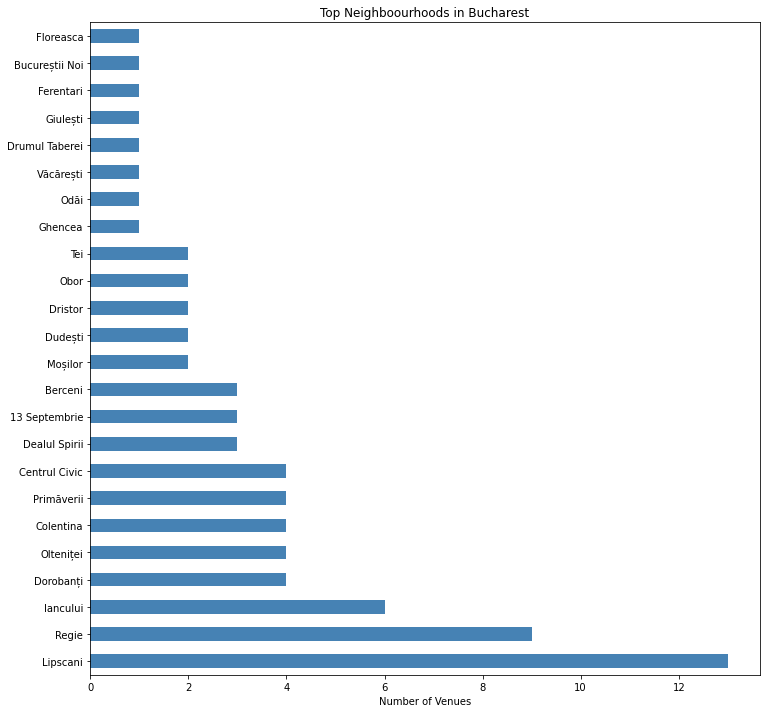

In [38]:
bc_venues.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Venues')
plt.title('Top Neighboourhoods in Bucharest')
plt.show()

In [39]:
bucharest_venues.groupby(['Neighbourhood'])['Venue Category'].value_counts(normalize=True)

Neighbourhood  Venue Category     
13 Septembrie  Department Store       0.333333
               Light Rail Station     0.333333
               Romanian Restaurant    0.333333
Berceni        Cheese Shop            0.333333
               Fountain               0.333333
                                        ...   
Regie          Sports Bar             0.111111
               Steakhouse             0.111111
Tei            Bar                    0.500000
               Electronics Store      0.500000
Văcărești      Fountain               1.000000
Name: Venue Category, Length: 73, dtype: float64

In [40]:
print('There are {} uniques categories.'.format(len(bucharest_venues['Venue Category'].unique())))

There are 47 uniques categories.


### Analyze each Neighbourhood

In [41]:

bucharest_onehot = pd.concat([bucharest_venues['Neighbourhood'],pd.get_dummies(bucharest_venues['Venue Category'])], axis=1)
print(bucharest_onehot.shape)
bucharest_onehot.head()


(75, 48)


,Neighbourhood,Art Museum,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Burger Joint,Bus Station,...,Plaza,Pub,Restaurant,Romanian Restaurant,Roof Deck,Spa,Sports Bar,Steakhouse,Supermarket,Turkish Restaurant
0,Berceni,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berceni,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berceni,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bucureștii Noi,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Centrul Civic,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [42]:
bucharest_grouped = bucharest_onehot.groupby('Neighbourhood').mean().reset_index()
bucharest_grouped

,Neighbourhood,Art Museum,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Burger Joint,Bus Station,...,Plaza,Pub,Restaurant,Romanian Restaurant,Roof Deck,Spa,Sports Bar,Steakhouse,Supermarket,Turkish Restaurant
0,13 Septembrie,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.00,0.000000,0.000000,0.00,0.000000
1,Berceni,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000
2,Bucureștii Noi,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000
3,Centrul Civic,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.250000,0.000000,0.500000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000
4,Colentina,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.25,0.000000
5,Dealul Spirii,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000
6,Dorobanți,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000
7,Dristor,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000
8,Drumul Taberei,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000
9,Dudești,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000


### Top Neighbourhood/venue

In [43]:
num_top_venues = 1

for hood in bucharest_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = bucharest_grouped[bucharest_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----13 Septembrie----
                 venue  freq
0  Romanian Restaurant  0.33


----Berceni----
      venue  freq
0  Fountain  0.33


----Bucureștii Noi----
    venue  freq
0  Bakery   1.0


----Centrul Civic----
        venue  freq
0  Restaurant   0.5


----Colentina----
         venue  freq
0  Supermarket  0.25


----Dealul Spirii----
        venue  freq
0  Art Museum  0.33


----Dorobanți----
    venue  freq
0  Bistro  0.25


----Dristor----
         venue  freq
0  Pizza Place   0.5


----Drumul Taberei----
        venue  freq
0  Restaurant   1.0


----Dudești----
                venue  freq
0  Italian Restaurant   0.5


----Ferentari----
               venue  freq
0  Food & Drink Shop   1.0


----Floreasca----
  venue  freq
0   Spa   1.0


----Ghencea----
      venue  freq
0  Pharmacy   1.0


----Giulești----
    venue  freq
0  Casino   1.0


----Iancului----
         venue  freq
0  Bus Station  0.33


----Lipscani----
                venue  freq
0  Turkish Restaurant  0.08


---

### Putting into Pandas framework

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = bucharest_grouped['Neighbourhood']

for ind in np.arange(bucharest_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bucharest_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,13 Septembrie,Department Store,Romanian Restaurant,Light Rail Station,Turkish Restaurant,Cheese Shop
1,Berceni,Cheese Shop,Fountain,Lebanese Restaurant,Farmers Market,Electronics Store
2,Bucureștii Noi,Bakery,Turkish Restaurant,Cheese Shop,Farmers Market,Electronics Store
3,Centrul Civic,Restaurant,Plaza,Chocolate Shop,Turkish Restaurant,Casino
4,Colentina,Supermarket,Spa,Eastern European Restaurant,Hotel,Turkish Restaurant


### Cluster Neighbourhoods

In [46]:
kclusters = 5
bucharest_grouped_clustering = bucharest_grouped.drop('Neighbourhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bucharest_grouped_clustering)

kmeans.labels_[0:10] 

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

In [47]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bucharest_merged = df

bucharest_merged = bucharest_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')


In [48]:
bucharest_merged.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Băneasa,44.493726,26.076048,NaN,NaN,NaN,NaN,NaN,NaN
1,Berceni,44.389221,26.118203,1.0,Cheese Shop,Fountain,Lebanese Restaurant,Farmers Market,Electronics Store
2,Bucureștii Noi,44.493619,26.031081,1.0,Bakery,Turkish Restaurant,Cheese Shop,Farmers Market,Electronics Store
3,Centrul Civic,44.427285,26.092441,1.0,Restaurant,Plaza,Chocolate Shop,Turkish Restaurant,Casino
4,Colentina,44.465766,26.148647,0.0,Supermarket,Spa,Eastern European Restaurant,Hotel,Turkish Restaurant


In [49]:
bucharest_grouped_clustering = bucharest_grouped.drop('Neighbourhood', 1)

### Using K-means clustering

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [51]:
max_range = 10

In [52]:
### silhouette analysis  seeks to define the dissimilarity of clusters which means its a measure of how close each point in one cluster is to points in the neighboring clusters.
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :

    bgc = bucharest_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(bgc)
    
    score = silhouette_score(bgc, kmeans)
    
    indices.append(kclusters)
    scores.append(score)

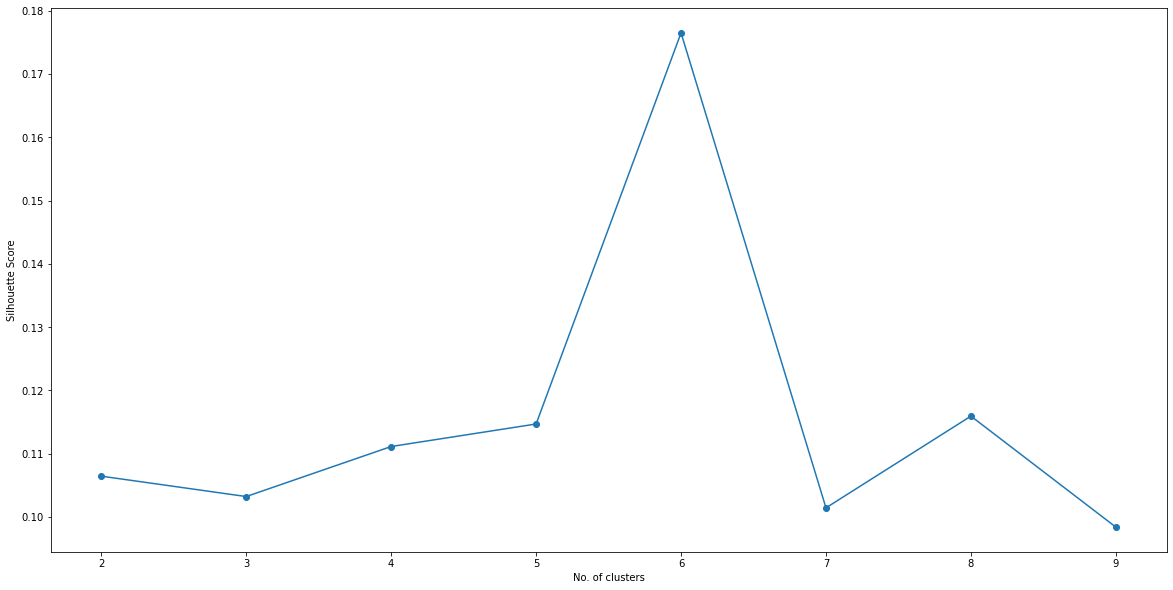

In [53]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [54]:
opt = np.argmax(scores) + 2
print(opt)

6


### K-means for optimal number of clustering

In [55]:
kclusters = opt
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit(bucharest_grouped_clustering)

In [56]:
neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1, inplace=True)

In [57]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [58]:
bucharest_merged = df

bucharest_merged = bucharest_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

In [59]:
bucharest_merged.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Băneasa,44.493726,26.076048,NaN,NaN,NaN,NaN,NaN,NaN
1,Berceni,44.389221,26.118203,1.0,Cheese Shop,Fountain,Lebanese Restaurant,Farmers Market,Electronics Store
2,Bucureștii Noi,44.493619,26.031081,3.0,Bakery,Turkish Restaurant,Cheese Shop,Farmers Market,Electronics Store
3,Centrul Civic,44.427285,26.092441,1.0,Restaurant,Plaza,Chocolate Shop,Turkish Restaurant,Casino
4,Colentina,44.465766,26.148647,1.0,Supermarket,Spa,Eastern European Restaurant,Hotel,Turkish Restaurant


In [60]:
print(bucharest_merged['Cluster Labels'].isnull().sum())
bucharest_merged.shape

15


(39, 9)

In [61]:
bucharest_merged.dropna(axis=0, inplace=True)
bucharest_merged.shape

(24, 9)

In [62]:
from geopy.geocoders import Nominatim
address = 'Bucharest, Romania'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [63]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(bucharest_merged['Latitude'], bucharest_merged['Longitude'], bucharest_merged['Neighbourhood'], bucharest_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [64]:
bucharest_merged.head(10)

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Berceni,44.389221,26.118203,1.0,Cheese Shop,Fountain,Lebanese Restaurant,Farmers Market,Electronics Store
2,Bucureștii Noi,44.493619,26.031081,3.0,Bakery,Turkish Restaurant,Cheese Shop,Farmers Market,Electronics Store
3,Centrul Civic,44.427285,26.092441,1.0,Restaurant,Plaza,Chocolate Shop,Turkish Restaurant,Casino
4,Colentina,44.465766,26.148647,1.0,Supermarket,Spa,Eastern European Restaurant,Hotel,Turkish Restaurant
8,Dealul Spirii,44.428385,26.085606,1.0,Art Museum,Nightclub,Café,Farmers Market,Electronics Store
9,Dorobanți,44.459076,26.096738,1.0,Cheese Shop,Creperie,Restaurant,Bistro,Turkish Restaurant
10,Dristor,44.418284,26.142541,1.0,Pizza Place,Café,Turkish Restaurant,Cheese Shop,Farmers Market
11,Drumul Taberei,44.421340,26.034485,1.0,Restaurant,Turkish Restaurant,Cheese Shop,Farmers Market,Electronics Store
12,Dudești,44.422229,26.130392,1.0,Italian Restaurant,Lebanese Restaurant,Turkish Restaurant,Food & Drink Shop,Electronics Store
13,Ferentari,44.392845,26.080579,2.0,Food & Drink Shop,Cheese Shop,Farmers Market,Electronics Store,Eastern European Restaurant


In [65]:
bucharest_merged['Cluster Labels'].value_counts()

1.0    19
4.0     1
5.0     1
0.0     1
2.0     1
3.0     1
Name: Cluster Labels, dtype: int64

In [66]:
venues0 = bucharest_merged.loc[bucharest_merged['Cluster Labels'] == 0].reset_index().drop(['index'],axis=1)
venues0

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Floreasca,44.466539,26.102152,0.0,Spa,Turkish Restaurant,Cheese Shop,Farmers Market,Electronics Store


In [67]:
venues1 = bucharest_merged.loc[bucharest_merged['Cluster Labels'] == 1].reset_index().drop(['index'],axis=1)
venues1

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berceni,44.389221,26.118203,1.0,Cheese Shop,Fountain,Lebanese Restaurant,Farmers Market,Electronics Store
1,Centrul Civic,44.427285,26.092441,1.0,Restaurant,Plaza,Chocolate Shop,Turkish Restaurant,Casino
2,Colentina,44.465766,26.148647,1.0,Supermarket,Spa,Eastern European Restaurant,Hotel,Turkish Restaurant
3,Dealul Spirii,44.428385,26.085606,1.0,Art Museum,Nightclub,Café,Farmers Market,Electronics Store
4,Dorobanți,44.459076,26.096738,1.0,Cheese Shop,Creperie,Restaurant,Bistro,Turkish Restaurant
5,Dristor,44.418284,26.142541,1.0,Pizza Place,Café,Turkish Restaurant,Cheese Shop,Farmers Market
6,Drumul Taberei,44.421340,26.034485,1.0,Restaurant,Turkish Restaurant,Cheese Shop,Farmers Market,Electronics Store
7,Dudești,44.422229,26.130392,1.0,Italian Restaurant,Lebanese Restaurant,Turkish Restaurant,Food & Drink Shop,Electronics Store
8,Ghencea,44.411369,26.021560,1.0,Pharmacy,Turkish Restaurant,Cheese Shop,Farmers Market,Electronics Store
9,Iancului,44.441328,26.133425,1.0,Bus Station,Grocery Store,Bagel Shop,Kebab Restaurant,Plaza


In [68]:
venues2 = bucharest_merged.loc[bucharest_merged['Cluster Labels'] == 2].reset_index().drop(['index'],axis=1)
venues2

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Ferentari,44.392845,26.080579,2.0,Food & Drink Shop,Cheese Shop,Farmers Market,Electronics Store,Eastern European Restaurant


In [69]:
venues3 = bucharest_merged.loc[bucharest_merged['Cluster Labels'] == 3].reset_index().drop(['index'],axis=1)
venues3

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bucureștii Noi,44.493619,26.031081,3.0,Bakery,Turkish Restaurant,Cheese Shop,Farmers Market,Electronics Store


In [70]:
venues4 = bucharest_merged.loc[bucharest_merged['Cluster Labels'] == 4].reset_index().drop(['index'],axis=1)
venues4

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Văcărești,44.404109,26.114987,4.0,Fountain,Turkish Restaurant,Cheese Shop,Farmers Market,Electronics Store


In [71]:
venues5 = bucharest_merged.loc[bucharest_merged['Cluster Labels'] == 5].reset_index().drop(['index'],axis=1)
venues5

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Giulești,44.45392,26.053113,5.0,Casino,Cheese Shop,Farmers Market,Electronics Store,Eastern European Restaurant


In [72]:
venues1.shape

(19, 9)

In [73]:
venues1.drop(index=venues1[venues1['1st Most Common Venue'].str.contains('(Café)')].index, inplace=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [74]:
venues1.drop(index=venues1[venues1['2nd Most Common Venue'].str.contains('(Café)')].index, inplace=True)


In [75]:
venues1.drop(index=venues1[venues1['3rd Most Common Venue'].str.contains('(Café)')].index, inplace=True)

In [76]:
venues1.drop(index=venues1[venues1['4th Most Common Venue'].str.contains('(Café)')].index, inplace=True)

In [77]:
venues1.drop(index=venues1[venues1['5th Most Common Venue'].str.contains('(Café)')].index, inplace=True).reset_index().drop(['index'],axis=1)

AttributeError: 'NoneType' object has no attribute 'reset_index'

In [78]:
venues1.shape

(16, 9)

In [79]:
venues1.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berceni,44.389221,26.118203,1.0,Cheese Shop,Fountain,Lebanese Restaurant,Farmers Market,Electronics Store
1,Centrul Civic,44.427285,26.092441,1.0,Restaurant,Plaza,Chocolate Shop,Turkish Restaurant,Casino
2,Colentina,44.465766,26.148647,1.0,Supermarket,Spa,Eastern European Restaurant,Hotel,Turkish Restaurant
4,Dorobanți,44.459076,26.096738,1.0,Cheese Shop,Creperie,Restaurant,Bistro,Turkish Restaurant
6,Drumul Taberei,44.421340,26.034485,1.0,Restaurant,Turkish Restaurant,Cheese Shop,Farmers Market,Electronics Store


In [80]:
venues1['1st Most Common Venue'].value_counts()

Cheese Shop                    2
Restaurant                     2
Steakhouse                     2
Department Store               1
Turkish Restaurant             1
BBQ Joint                      1
Italian Restaurant             1
Eastern European Restaurant    1
Supermarket                    1
Bus Station                    1
Sports Bar                     1
Pharmacy                       1
Electronics Store              1
Name: 1st Most Common Venue, dtype: int64

In [81]:
venues=venues1.loc[venues1['1st Most Common Venue'] == 'Restaurant'].reset_index().drop(['index'],axis=1)
venues

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Centrul Civic,44.427285,26.092441,1.0,Restaurant,Plaza,Chocolate Shop,Turkish Restaurant,Casino
1,Drumul Taberei,44.421340,26.034485,1.0,Restaurant,Turkish Restaurant,Cheese Shop,Farmers Market,Electronics Store


<a id='item1'></a>
## Methodology

<a id='item1'></a>
## Results

<a id='item1'></a>
## Discussion